# Loading Image

In [1]:
from google.colab import files
uploaded = files.upload()

Saving illusion_image.jpg to illusion_image.jpg


In [27]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
os.getcwd()

'/content'

In [28]:
!ls

illusion_image.jpg  sample_data


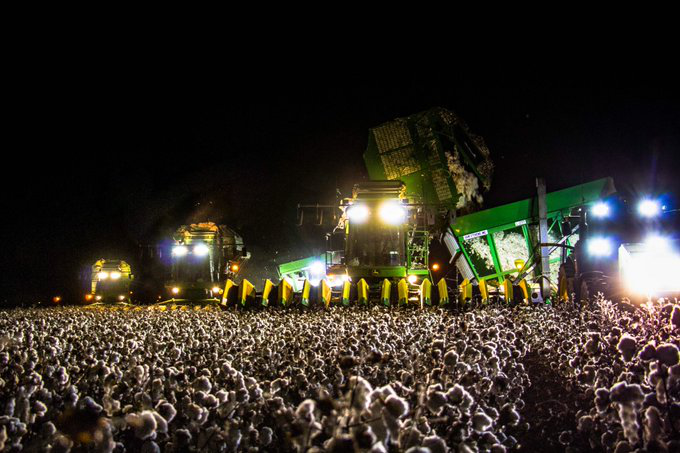

In [29]:
image_real = Image.open(BytesIO(uploaded['illusion_image.jpg']))
image_real

## Convert the image into array shape

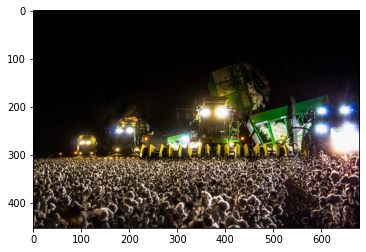

In [30]:
img = cv2.imread('illusion_image.jpg')
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [31]:
img_cvt.shape

(453, 680, 3)

### Importing dependencies for PyTorch Framework

In [32]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image

### Pre Trained Models Selection from Torch hub 

In [33]:
resnet = models.resnet50(pretrained=True)
vgg = models.vgg16(pretrained=True)
inception = models.inception_v3(pretrained=True)
efficientnet = torch.hub.load('rwightman/gen-efficientnet-pytorch', 'efficientnet_b0', pretrained=True)
densenet = models.densenet121(pretrained=True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


  0%|          | 0.00/104M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/rwightman/gen-efficientnet-pytorch/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b0_ra-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_ra-3dd342df.pth
/usr/local/lib/python3.8/dist-packag

  0%|          | 0.00/30.8M [00:00<?, ?B/s]

## Pre Trained models Evaluations

# 1 VGG

In [36]:
vgg.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# 2 DenseNet

In [37]:
densenet.eval()



DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

# 3 ResNet 

In [38]:
resnet.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# 4 EfficientNet

In [39]:
efficientnet.eval()

GenEfficientNet(
  (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): SiLU(inplace=True)
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): SiLU(inplace=True)
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
      )
    )
    (1): Seque

# Input Data Image Rescale Transformation as of Pre Trained Models and Normalisations

In [40]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Input of illusion image into transform parameters

In [45]:
transform = transforms.ToTensor()
image = transform(img_cvt)  
image = image.unsqueeze(0)

In [47]:
image  # We have a normile input image

tensor([[[[0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
          ...,
          [0.2549, 0.1882, 0.1529,  ..., 0.0510, 0.0510, 0.0510],
          [0.1255, 0.0941, 0.1098,  ..., 0.0549, 0.0549, 0.0510],
          [0.0667, 0.0627, 0.0902,  ..., 0.0784, 0.0824, 0.0745]],

         [[0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
          ...,
          [0.1647, 0.1098, 0.0824,  ..., 0.0275, 0.0275, 0.0275],
          [0.0510, 0.0196, 0.0431,  ..., 0.0314, 0.0314, 0.0275],
          [0.0078, 0.0039, 0.0392,  ..., 0.0549, 0.0471, 0.0392]],

         [[0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039,  ..., 0

In [49]:
image.shape # converted into Torch Tensor of Batch size 1

torch.Size([1, 3, 453, 680])

# Checking the Prediction of this input tensor against the each of the Pre Trained model

In [67]:
with torch.no_grad():
    resnet_output = resnet(image)
    _, resnet_prediction = torch.max(resnet_output, 1)

    vgg_output = vgg(image)
    _, vgg_prediction = torch.max(vgg_output, 1)

    inception_output = inception(image)
    inception_logits = inception_output.logits
    _, inception_prediction = torch.max(inception_logits, dim=1)


    efficientnet_output = efficientnet(image)
    _, efficientnet_prediction = torch.max(efficientnet_output, 1)

    densenet_output = densenet(image)
    _, densenet_prediction = torch.max(densenet_output, 1)
    

# Predictions with Pre Trained models

In [68]:
predictions = {
    "ResNet": resnet_prediction.item(),
    "VGG": vgg_prediction.item(),
    "Inception": inception_prediction.item(),
    "EfficientNet": efficientnet_prediction.item(),
    "DenseNet": densenet_prediction.item()
}



In [55]:

# Print the predictions for comparison
for model, prediction in predictions.items():
    print(model, "prediction:", prediction)



ResNet prediction: 595
VGG prediction: 595
EfficientNet prediction: 819
DenseNet prediction: 595


# Comparasion of the results

In [70]:
for model, prediction in predictions.items():
    print(model, "prediction:", prediction)



ResNet prediction: 595
VGG prediction: 595
Inception prediction: 674
EfficientNet prediction: 819
DenseNet prediction: 595


# Matching it with ImageNet Classes labels

# Download ImageNet class labels

In [81]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2023-02-16 19:41:10--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2023-02-16 19:41:10 (87.3 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [83]:
!ls

illusion_image.jpg  imagenet_classes.txt  sample_data


In [88]:
image_labels = []
with open("imagenet_classes.txt", "r") as f:
    image_labels =  [s.strip() for s in f.readlines()]
image_labels[:4]

['tench', 'goldfish', 'great white shark', 'tiger shark']

# Length of total numbers of classes

In [89]:
len(image_labels)

1000

In [94]:
for model, prediction in predictions.items():
    print(model, "prediction:", prediction)

ResNet prediction: 595
VGG prediction: 595
Inception prediction: 674
EfficientNet prediction: 819
DenseNet prediction: 595


In [101]:
resnet_label = image_labels[resnet_prediction.item()]
print("ResNet label:", resnet_label)


vgg_label = image_labels[vgg_prediction.item()]
print("VGG label:", vgg_label)


inception_label = image_labels[inception_prediction.item()]
print("Inception label:", inception_label)


efficientnet_label = image_labels[efficientnet_prediction.item()]
print("EfficientNet label:",  efficientnet_label)


densenet_label = image_labels[densenet_prediction.item()]
print("DenseNet label:",  densenet_label)


ResNet label: harvester
VGG label: harvester
Inception label: mousetrap
EfficientNet label: stage
DenseNet label: harvester


# Predictions Results

In [104]:
# Print the predictions and labels for comparison
print("ResNet prediction:", resnet_prediction.item(), "label:", resnet_label)
print("VGG prediction:", vgg_prediction.item(), "label:", vgg_label)
print("Inception prediction:", inception_prediction.item(), "label:", inception_label)
print("EfficientNet prediction:", efficientnet_prediction.item(), "label:", efficientnet_label)
print("DenseNet prediction:", densenet_prediction.item(), "label:", densenet_label)

ResNet prediction: 595 label: harvester
VGG prediction: 595 label: harvester
Inception prediction: 674 label: mousetrap
EfficientNet prediction: 819 label: stage
DenseNet prediction: 595 label: harvester


# **Conclusion**

The provided image is representing the illusion to the eyes. I provide this image as in inference to 5 different Pre Trained Deep learning models as in input without any weights freezing for the Top Layers. 


I use the PyTorch Framework for the implementations. I map the models predictions outputs with imageNet classes. To evaluate the inference performace of all the models, the results regarding the performance are store in **"Predictions Results"** section.

The Classifier have accurate results by mapping with True imageNet Labels.

1.   **ResNet**
2.   **VGG**
3.  **DenseNet**


Different CNN architecture are better suited to different types of images, and there is possiblity that the these 3 top performing architecture used in ResNet, VGG, and DenseNet is better suited to images that contain the type of visual illusion.


Another reason is the type of networks architecture. They are difference from one another, different numbers of layers in each of the architecture. Trained with differnt weight initilisations, differnt hyperparameters, different optimisers are use in them .


In reality there is always a Tradeoff between models speed and accuracy. 
